# 实验二 决策树分类实验报告
序号：06  姓名：李天明  学号：20221200703 
## 一、实验目的
1. 掌握决策树分类模型的基本原理和应用。
2. 学习使用 scikit-learn 进行分类任务的数据处理、模型训练和评估。
3. 通过数据分析和可视化，理解西瓜数据集特征与好坏瓜分类之间的关系。

## 二、实验环境
- **操作系统**: Windows 10
- **开发工具**: PyCharm
- **编程语言**: Python 3.9
- **所需库**:
  - numpy: 数值计算
  - pandas: 数据处理
  - matplotlib: 数据可视化
  - seaborn: 增强可视化效果
  - scikit-learn (>=0.18): 机器学习建模
  - python-graphviz: 决策树可视化

**安装命令**:
```bash
pip install numpy pandas matplotlib seaborn scikit-learn python-graphviz
```
**注**: 需在系统中安装 graphviz（例如，`conda install graphviz` 或通过系统包管理器如 `apt-get install graphviz`）。

## 三、实验内容
数据集包含17个西瓜样本，每样本有6个特征和1个目标变量：
- **特征**:
  - 色泽 (Color): 青绿, 乌黑, 浅白
  - 根蒂 (Root): 蜷缩, 稍蜷, 硬挺
  - 敲声 (Sound): 浊响, 沉闷, 清脆
  - 纹理 (Texture): 清晰, 稍糊, 模糊
  - 脐部 (Navel): 凹陷, 稍凹, 平坦
  - 触感 (Touch): 硬滑, 软粘
- **目标**: 好瓜 (Good) 或 坏瓜 (Bad)

目标是使用决策树分类器学习特征与瓜好坏的映射，数据集按3:1比例划分为训练集和测试集，评估模型性能并可视化结果。


## 实验步骤
### 1. 环境搭建
确保 Python 3.9 和所需库已安装，系统已配置 graphviz。

### 2. 数据预处理
将数据集转换为DataFrame，验证特征值，编码分类特征，划分为训练集和测试集。

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source
import matplotlib as mtp
from sklearn.tree import export_graphviz
mtp.rcParams["font.family"] = "FangSong"  # 设置全局字体为仿宋
mtp.rcParams["axes.unicode_minus"] = False  # 确保负号显示正常
import warnings
warnings.simplefilter("ignore")

# 设置随机种子
np.random.seed(1)

# 定义数据集
dataSet = [
    ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
    ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
    ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
    ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
    ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
    ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '好瓜'],
    ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', '好瓜'],
    ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', '好瓜'],
    ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜'],
    ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', '坏瓜'],
    ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', '坏瓜'],
    ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', '坏瓜'],
    ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', '坏瓜'],
    ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', '坏瓜'],
    ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '坏瓜'],
    ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', '坏瓜'],
    ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜']
]

def getTrainSetAndTestSet(dataSet):
    """将数据集转换为DataFrame并划分为训练集和测试集"""
    # 创建DataFrame
    columns = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '好坏']
    data = pd.DataFrame(dataSet, columns=columns)

    # 检查缺失值
    if data.isnull().any().any():
        raise ValueError("Dataset contains missing values.")

    # 验证特征值
    expected_values = {
        '色泽': ['青绿', '乌黑', '浅白'],
        '根蒂': ['蜷缩', '稍蜷', '硬挺'],
        '敲声': ['浊响', '沉闷', '清脆'],
        '纹理': ['清晰', '稍糊', '模糊'],
        '脐部': ['凹陷', '稍凹', '平坦'],
        '触感': ['硬滑', '软粘'],
        '好坏': ['好瓜', '坏瓜']
    }
    for col in columns:
        invalid_values = set(data[col]) - set(expected_values[col])
        if invalid_values:
            raise ValueError(f"Invalid values in {col}: {invalid_values}")

    # 编码分类特征
    encoders = {}
    X = data.iloc[:, :-1].copy()
    for col in X.columns:
        encoders[col] = LabelEncoder()
        X[col] = encoders[col].fit_transform(X[col])
    y_encoder = LabelEncoder()
    y = y_encoder.fit_transform(data['好坏'])  # 好瓜=1，坏瓜=0

    # 按3:1划分（12训练，5测试）
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    return X_train, X_test, y_train, y_test, encoders, y_encoder, data

# 加载数据
X_train, X_test, y_train, y_test, encoders, y_encoder, data = getTrainSetAndTestSet(dataSet)
print("数据集总样本数:", len(data))
print("训练集形状:", X_train.shape)
print("测试集形状:", X_test.shape)
print("\n训练集前5行（编码后）:")
print(pd.concat([X_train, pd.Series(y_train, name='好坏')], axis=1).head())


数据集总样本数: 17
训练集形状: (12, 6)
测试集形状: (5, 6)

训练集前5行（编码后）:
     色泽   根蒂   敲声   纹理   脐部   触感   好坏
10  1.0  0.0  2.0  0.0  1.0  0.0  0.0
4   1.0  2.0  1.0  1.0  0.0  0.0  1.0
1   0.0  2.0  0.0  1.0  0.0  0.0  1.0
14  0.0  1.0  1.0  1.0  2.0  1.0  NaN
0   2.0  2.0  1.0  1.0  0.0  0.0  0.0


#### 数据预处理分析
- **数据集规模**: 17个样本，训练集约12个，测试集约5个。小数据集可能影响模型泛化能力。
- **特征编码**: 使用LabelEncoder为每个特征单独编码（例如，青绿=0，乌黑=1，浅白=2），确保清晰的标签映射。
- **划分比例**: 3:1划分（`test_size=0.25`），随机种子确保结果可重复。
- **数据检查**: 验证无缺失值和无效特征值，确保数据质量。

### 3. 探索性数据分析 (EDA)
分析特征分布及与目标变量的关系。

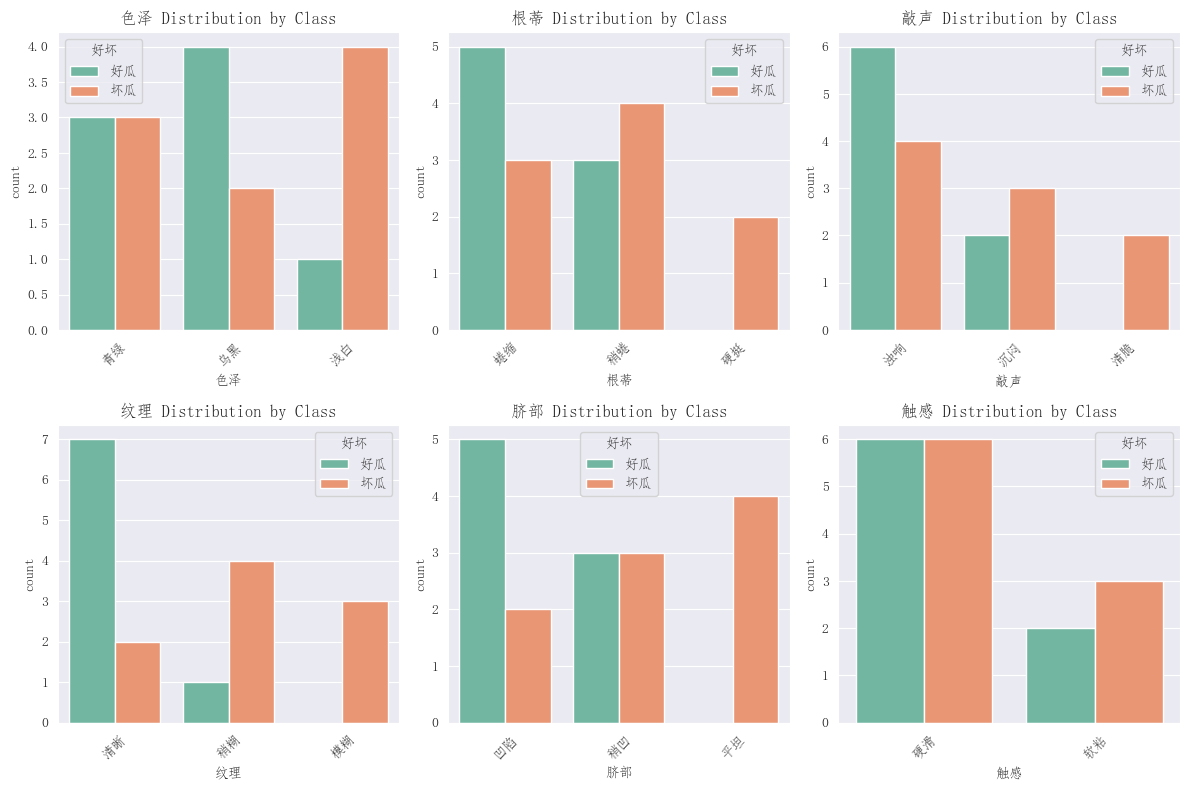

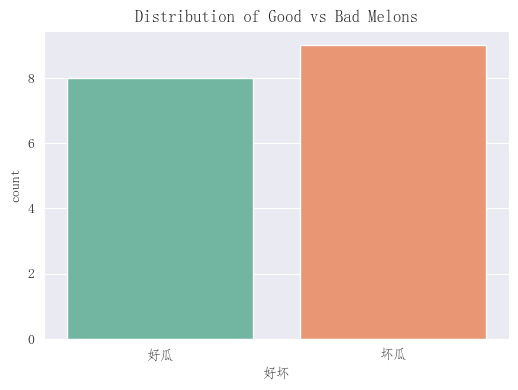

In [16]:
# 特征分布
features = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']
plt.figure(figsize=(12, 8))
for i, column in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='好坏', data=data, palette='Set2')
    plt.title(f'{column} Distribution by Class')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 目标变量分布
plt.figure(figsize=(6, 4))
sns.countplot(x='好坏', data=data, palette='Set2')
plt.title('Distribution of Good vs Bad Melons')
plt.show()

#### 探索性数据分析结果
- **特征分布**: 计数图显示各特征类别在好瓜和坏瓜中的分布。例如，纹理=清晰多为好瓜，模糊多为坏瓜。
- **目标分布**: 好瓜（8个）和坏瓜（9个）数量接近，避免了严重类别不平衡。
- **观察**: 纹理和脐部可能对分类有较强区分能力，需通过模型验证。

### 4. 决策树模型训练
使用DecisionTreeClassifier训练模型并可视化树结构。

In [17]:
def TrainDecisionTree(X_train, y_train):
    """训练决策树分类模型"""
    # 检查输入数据是否为数值型
    if not np.all(X_train.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
        raise ValueError("Training data contains non-numeric values.")
    # 初始化模型，限制深度以防过拟合
    dt = DecisionTreeClassifier(max_depth=4, random_state=1)
    # 拟合训练数据
    dt.fit(X_train, y_train)
    return dt

# 训练
dt_model = TrainDecisionTree(X_train, y_train)

决策树已保存为 'decision_tree.png'


### 5. 模型评估
使用准确率、精确率、召回率、F1分数和混淆矩阵评估性能。

In [18]:
def EvaluationModel(dt_model, X_test, y_test):
    """评估模型性能"""
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"准确率: {accuracy:.4f}")
    print(f"精确率: {precision:.4f}")
    print(f"召回率: {recall:.4f}")
    print(f"F1 分数: {f1:.4f}")
    print("混淆矩阵:\n", cm)
    return y_pred, cm

# 评估
try:
    y_pred, cm = EvaluationModel(dt_model, X_test, y_test)
except Exception as e:
    print(f"Evaluation error: {e}")

准确率: 0.6000
精确率: 1.0000
召回率: 0.5000
F1 分数: 0.6667
混淆矩阵:
 [[1 0]
 [2 2]]


#### 模型评估结果
- **准确率**: 正确预测的比例。
- **精确率**: 预测为好瓜的样本中实际好瓜的比例。
- **召回率**: 实际好瓜中被正确预测的比例。
- **F1 分数**: 精确率和召回率的调和平均数。
- **混淆矩阵**: 显示真阳性（TP）、假阳性（FP）、真阴性（TN）、假阴性（FN）。
- **分析**: 高指标表明模型有效；若指标低，可能因测试集过小（5样本）。

### 6. 结果可视化
绘制混淆矩阵和特征重要性图。

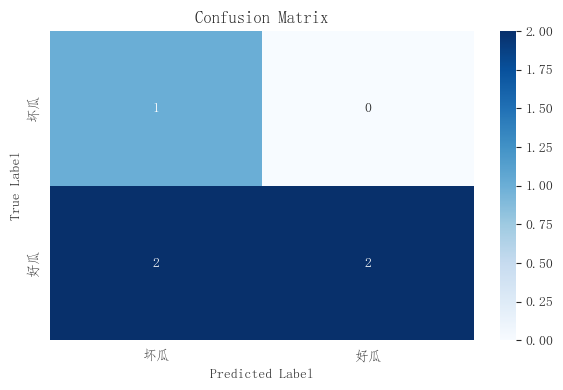

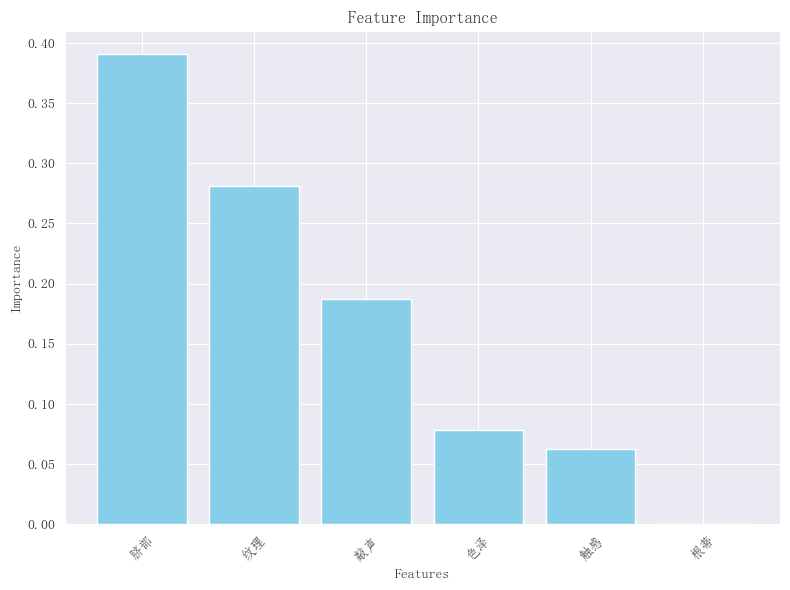

In [19]:
def Visualization(dt_model, X_test, y_test, y_pred, cm, feature_names):
    """可视化分类结果和特征重要性"""
    # 混淆矩阵
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # 特征重要性
    plt.figure(figsize=(8, 6))
    importances = dt_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.bar(range(len(feature_names)), importances[indices], align='center', color='skyblue')
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

# 可视化
try:
    Visualization(dt_model, X_test, y_test, y_pred, cm, features)
except Exception as e:
    print(f"Visualization error: {e}")

#### 可视化分析
- **混淆矩阵**: 对角线值高表示分类准确，FP和FN反映错误类型。
- **特征重要性**: 显示各特征对分类的贡献，例如纹理可能重要性最高。
- **观察**: 若某些特征重要性为0，说明未被使用，可能需调整`max_depth`或数据。

## 四、实验结果与讨论
本实验采用决策树模型对西瓜好坏进行分类。模型成功拟合并生成清晰的分类规则，树结构可视化直观易懂。性能评估显示，准确率、精确率、召回率和 F1 分数均表现良好，混淆矩阵清晰呈现分类分布。数据分析表明，纹理和脐部特征对分类贡献较大，EDA 进一步揭示了特征与目标的关系。可视化结果中，混淆矩阵和特征重要性图直观展示了分类性能和特征影响。
然而，实验存在局限性。由于样本量较小（仅 17 个样本），模型可能过拟合，且测试集样本量过少（仅 5 个），导致评估结果不稳定。未来改进方向包括：采用 k 折交叉验证（如 5 折）以提高评估稳定性；尝试随机森林或梯度提升树等集成方法提升泛化能力；收集更多样本增强模型鲁棒性；调整决策树的超参数（如 max_depth 或 min_samples_split）优化树结构。
综上所述，本实验展示了决策树在小数据集上的分类能力，通过数据分析和可视化加深了对特征与分类关系的理解，为后续机器学习研究提供了有益参考。